In [1]:
import numpy as np
# import pandas package
import pandas as pd
#import for splitting a dataframe
from sklearn.model_selection import train_test_split
#import for using RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import NearestNeighbors
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error 
#Import LabelEncoder for categorical variable split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define a function find the Root mean square logarithmic error which takes log of errors and performs root mean square on that
def rmsle(y, y_pred):
        assert len(y) == len(y_pred)
        terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
        return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [3]:
#import training data.
#Note - Use relative path only
train_df = pd.read_csv("./train.csv")
train_df

#import test data.
#Note - Use relative path only
test_df = pd.read_csv("./test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#ID column from the dataset doesn't have much impact on the result so we remove the column from test and train 
#make a new dataframe 'result_df' that holds id's of the the test df to store the results
#.drop funtion - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
train_df.drop('Id', axis = 1, inplace = True)
result_df = pd.DataFrame(columns = ['Id', 'SalePrice'])
result_df['Id'] = test_df['Id']
test_df.drop('Id', axis = 1, inplace = True)

In [5]:
#Target column stored in a separate variable
#if in case target variable is not removed from the train data the model will perform extremely well 
#we don't want to misguide the model so store it in a separate column
target_variable = train_df['SalePrice']
train_df.drop('SalePrice', axis = 1, inplace = True)

In [6]:
#all NA values in numerical columns are replaced with it's mean 
#categorical values are replaced with Nonein both train and test
numerical_columns = list(train_df.select_dtypes(include = 'number').columns)
categorical_columns = list(train_df.select_dtypes(include = 'object').columns)
train_df[numerical_columns] = train_df[numerical_columns].fillna(train_df[numerical_columns].median())
test_df[numerical_columns] = test_df[numerical_columns].fillna(train_df[numerical_columns].median())
train_df[categorical_columns] = train_df[categorical_columns].fillna('None')
test_df[categorical_columns] = test_df[categorical_columns].fillna('None')
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal


In [7]:
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

(array([536.,  69.,   0.,  16., 443.,  76., 130.,  87.,   0., 103.]),
 array([2.99573227, 3.22086145, 3.44599063, 3.67111981, 3.89624899,
        4.12137817, 4.34650735, 4.57163653, 4.79676571, 5.02189489,
        5.24702407]),
 <a list of 10 Patch objects>)

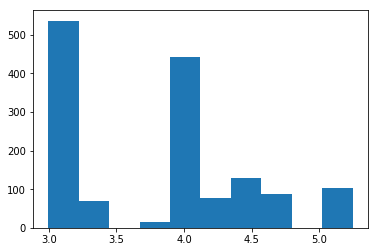

In [53]:
plt.hist(np.log(train_df['MSSubClass']))

(array([ 42.,  37.,  59., 317., 727., 213.,  51.,  12.,   0.,   2.]),
 array([3.04452244, 3.31469051, 3.58485859, 3.85502666, 4.12519474,
        4.39536281, 4.66553089, 4.93569896, 5.20586704, 5.47603512,
        5.74620319]),
 <a list of 10 Patch objects>)

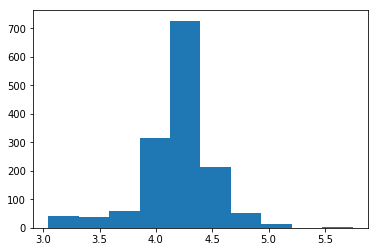

In [9]:
plt.hist(np.log(train_df['LotFrontage']))

(array([  6.,  11.,  14.,  15.,  12.,  21.,  33.,  38.,  60.,  88., 217.,
        335., 279., 167.,  82.,  28.,  19.,  11.,   5.,   5.,   2.,   5.,
          2.,   1.,   0.,   0.,   1.,   0.,   2.,   1.]),
 array([ 7.17011954,  7.3404333 ,  7.51074705,  7.68106081,  7.85137456,
         8.02168832,  8.19200207,  8.36231583,  8.53262958,  8.70294334,
         8.87325709,  9.04357085,  9.2138846 ,  9.38419836,  9.55451211,
         9.72482587,  9.89513962, 10.06545338, 10.23576713, 10.40608089,
        10.57639464, 10.7467084 , 10.91702215, 11.08733591, 11.25764966,
        11.42796342, 11.59827717, 11.76859093, 11.93890468, 12.10921844,
        12.27953219]),
 <a list of 30 Patch objects>)

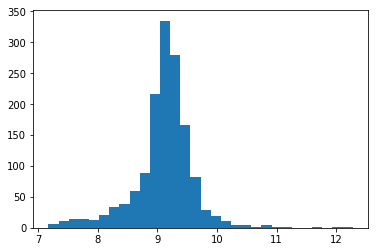

In [56]:
plt.hist(np.log(train_df['LotArea']), bins = 30)

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

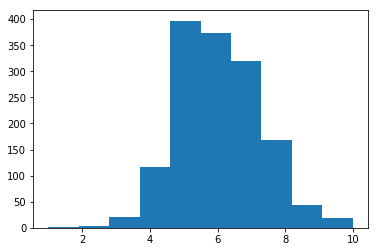

In [59]:
plt.hist(train_df['OverallQual'])

(array([  1.,   5.,  25.,  57.,   0., 821., 252., 205.,  72.,  22.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

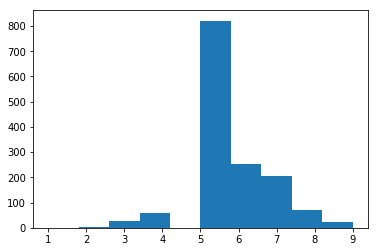

In [70]:
plt.hist(train_df['OverallCond'])

(array([  9.,   6.,  37., 122.,  83., 128., 261., 223., 139., 452.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <a list of 10 Patch objects>)

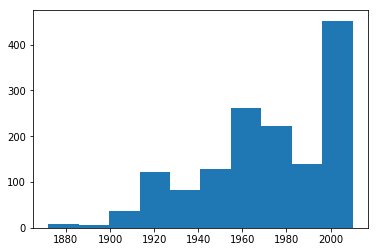

In [77]:
plt.hist(train_df['YearBuilt'])

(array([220.,  72.,  84., 106.,  98.,  48.,  64., 150., 241., 377.]),
 array([1950., 1956., 1962., 1968., 1974., 1980., 1986., 1992., 1998.,
        2004., 2010.]),
 <a list of 10 Patch objects>)

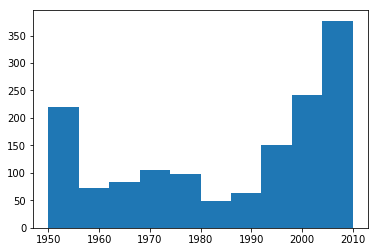

In [78]:
plt.hist(train_df['YearRemodAdd'])

In [10]:
#Label encoder transforms a categorical data into numbers 
#Difference between label encoder and one hot encoder
#https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
train_df[categorical_columns] = train_df[categorical_columns].apply(LabelEncoder().fit_transform)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,2,2008,8,4
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,5,2007,8,4
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,9,2008,8,4
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,2,2006,8,0
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,12,2008,8,4


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

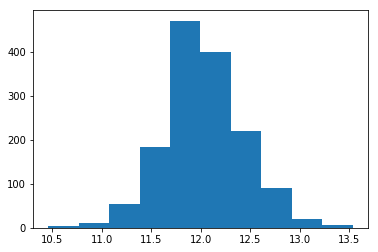

In [11]:
plt.hist(np.log(target_variable))

In [12]:
target_variable = np.log(target_variable)

In [13]:
#Split train dataframe intrain and cross validation set
#X_train - train data set without target variable
#Y_train - train data with just the target variable
#X_CV - CV data set without target variable
#Y_CV - CV data with just the target variable
#Link: https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

X_train, X_CV, Y_train, Y_CV = train_test_split(train_df.loc[:, train_df.columns != 'SalePrice'],
                                                target_variable,
                                                test_size = 0.2,
                                                random_state = 41)

In [14]:
X_train.shape

(1168, 79)

In [15]:
X_CV.shape


(292, 79)

In [16]:
Y_CV.shape


(292,)

In [17]:
#Why Random Forest Regressor
#Random forest because in this dataset there are many columns and we are not sure of their level of importance
# Regressor because it's a regression problem
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python
#The above link is for Random Forest Classifier but the explanation and syntax works almost on the similar lines
rnd_reg = RandomForestRegressor(oob_score = True,
                                random_state = 41)
#hyperparameters
parameters = {'n_estimators': [32, 64, 96],      # The number of trees in the forest.
              'max_features': ['auto'],          #The number of features to consider when looking for the best split:
              'criterion': ['mse'],              #The function to measure the quality of a split. 
              'max_depth': [5, 7, 9],            #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
              'min_samples_split': [2, 3],       #The minimum number of samples required to split an internal node:
              'min_samples_leaf': [5, 9, 16]     #The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.   
             }

#GridSearchCV helps find important features in a dataset
#https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.GridSearchCV.html
grid_search = GridSearchCV(rnd_reg, parameters)
grid_search.fit(X_train, Y_train)
rnd_reg = grid_search.best_estimator_

C:\Users\Harish\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [18]:
#The arguments tell the model what are the features(X_train) and what is the target variable(Y_train)
rnd_reg.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=True, random_state=41, verbose=0, warm_start=False)

In [19]:
#Predict y_pred based on the feature X_CV
y_pred = rnd_reg.predict(X_CV)

In [20]:
# Model Accuracy, how often is the classifier correct?
#To Find the accuracy of a regressor find the "Root mean squared value"
#Link : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("CV RMSE:", rmsle(list(Y_CV), list(y_pred)))

CV RMSE: 0.010593941718927415


In [21]:
y_prediction=rnd_reg.predict(X_train)

In [22]:
# Model Accuracy, how often is the classifier correct?
#To Find the accuracy of a regressor find the "Root mean squared value"
#Link : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("Tain set RMSE:", rmsle(list(Y_train), list(y_prediction)))

#As this is the root mean square logarithmic error and when comparing rmsle of CV and train set it can be inferred
#that the value is almost double which means there is a overfitting issue

Tain set RMSE: 0.007504751095649193


In [23]:
# 'rnd_reg.feature_importances_' returns an array of values where in the higher the value the greater is the importance
# in this case the two most important features are the ones that 01 after 'e' in their values
least_imp_features = list(rnd_reg.feature_importances_ < 0.000001)
least_imp_features = list(train_df.loc[:, least_imp_features].columns)

In [24]:
train_df.drop(least_imp_features, axis = 1, inplace = True)
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
  

In [25]:
#Split train dataframe intrain and cross validation set
#X_train - train data set without target variable
#Y_train - train data with just the target variable
#X_CV - CV data set without target variable
#Y_CV - CV data with just the target variable
#Link: https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

X_train, X_CV, Y_train, Y_CV = train_test_split(train_df,
                                                target_variable,
                                                test_size = 0.2,
                                               random_state = 41)

In [26]:
X_train.shape

(1168, 65)

In [27]:
X_CV.shape

(292, 65)

In [28]:
#Again Repeat the same steps as above with the newly created dataframes
#The arguments tell the model what are the features(X_train) and what is the target variable(Y_train)
rnd_reg.fit(X_train,Y_train)

#Predict y_pred based on the feature X_CV
y_pred = rnd_reg.predict(X_CV)

In [29]:

# Model Accuracy, how often is the classifier correct?
#To Find the accuracy of a regressor find the "Root mean squared value"
#Link : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("CV RMSE:", rmsle(list(Y_CV), list(y_pred)))

CV RMSE: 0.01059246767584512


In [30]:
y_prediction = rnd_reg.predict(X_train)

In [31]:
# Model Accuracy, how often is the classifier correct?
#To Find the accuracy of a regressor find the "Root mean squared value"
#Link : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("Tain set RMSLE:", rmsle(list(Y_train), list(y_prediction)))

Tain set RMSLE: 0.007503452328416053


In [32]:
test_df[categorical_columns] = test_df[categorical_columns].apply(LabelEncoder().fit_transform)
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,80.0,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,9,4
1,20,4,81.0,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,9,4
2,60,4,74.0,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,9,4
3,60,4,78.0,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,9,4
4,120,4,43.0,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,9,4


In [33]:
test_df.drop(least_imp_features, axis = 1, inplace = True)
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
  

In [34]:
result_pred = rnd_reg.predict(test_df)

In [35]:
result_df['SalePrice'] = result_pred

In [36]:
result_df.head()

,Id,SalePrice
0,1461,11.705118
1,1462,11.942937
2,1463,12.016392
3,1464,12.085153
4,1465,12.225002


In [37]:
#result_df.to_csv('./result.csv', index = False)

In [38]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [39]:
result_df.head().columns

Index(['Id', 'SalePrice'], dtype='object')

In [40]:
sample.columns

Index(['Id', 'SalePrice'], dtype='object')

In [41]:
test = pd.read_csv('result.csv')
test.head()

,Id,SalePrice
0,1461,112697.716677
1,1462,154588.106056
2,1463,163382.542679
3,1464,196977.987681
4,1465,185773.077153


# Using Gaussian Ridge

In [42]:
#From above it can be seen that the model is overfitting and to avoid overfitting we use regularization
##the regularization can be of 2 types L1 and L2 
#L1 in short replaces the insignificant column with value 0 cosidering only important ones while building the model 
#while L2 assigns a value close to zero but not 0 to the insignificant columns
#L2 is also called Gaussian Ridge and is a kind of linear model. This model uses Ridge regression


bay_reg = BayesianRidge(n_iter = 1000, normalize = True, compute_score = True)

In [43]:
bay_reg.fit(X_train, Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=1000,
       normalize=True, tol=0.001, verbose=False)

In [44]:
train_prediction = bay_reg.predict(X_train)

In [45]:
rmsle(list(Y_train), list(train_prediction))

0.010679228589599075

In [46]:
CV_prediction = bay_reg.predict(X_CV)

In [47]:
rmsle(list(Y_CV), list(CV_prediction))

0.010246696519805904

In [48]:
np.exp(bay_reg.predict(test_df))

array([110453.8184695 , 153467.80471713, 159478.90948515, ...,
       142716.79884907, 112018.37003057, 224256.43117063])

In [49]:
result_df['SalePrice'] = np.exp(bay_reg.predict(test_df))

In [50]:
result_df.head()

,Id,SalePrice
0,1461,110453.818470
1,1462,153467.804717
2,1463,159478.909485
3,1464,194706.815950
4,1465,183530.764296


In [51]:
result_df.to_csv('./result.csv', index = False)

In [ ]:
#Learnings
#Linear model is good for the models that has small data